<a href="https://colab.research.google.com/github/Solarahamza/Menstruation-and-Dignity-in-Wartime-Sudan/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

sud = pd.read_csv("Translated New - Sheet1 (2).csv")
sud = sud.applymap(lambda x: x.lower() if isinstance(x, str) else x)
sud.head()

/tmp/ipython-input-4259659829.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sud = sud.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,Age,Educational,MaritalStatus,Employment,DisplacementStatus,Residence,Locality,State,Amenities,Residence Type (inside Sudan),...,HealthStatus,Diagnosis,ManagementChallenges,ReceivedAid,AidType,AidSource,HealthEdu,EduFeedback,DignityImpact,Experience
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,1,vaginitis/infection,"difficult access to private bathrooms, a safe ...",no,disposable pads,feminist organization,no,NaN,yes,there's nothing specific
1,25-34 years,university,married,yes,yes,inside sudan,atbara,river nile,city,we rented a house/apartment,...,1,contact dermatitis/irritation,"privacy, a safe disposal site for used cycle p...",no,NaN,NaN,no,NaN,yes,lack of privacy was the biggest obstacle i fac...
2,18-24 years,university,married,no,yes,inside sudan,al qadarif,al qadarif,city,we rented a house/apartment,...,1,vaginitis/infection,a safe disposal site for used cycle products,no,NaN,NaN,yes,useful,yes,problems with the high cost and scarcity of di...
3,25-34 years,other,married,no,yes,inside sudan,omdurman,khartoum,city,with one of our relatives,...,1,contact dermatitis/irritation,difficult access to private bathrooms,yes,"dignity bag (pads, soap, underwear)",refugee camp,yes,benefit from the advice provided.,yes,"i didn't feel safe. i was far from home, there..."
4,18-24 years,university,single,no,no,inside sudan,rabak,white nile,city,our owned house,...,1,vaginitis/infection,privacy,no,NaN,NaN,yes,there was very clear education about the dange...,i'm not sure,the only difficulty i faced during my period w...


In [ ]:
sud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            151 non-null    object
 1   Educational                    151 non-null    object
 2   MaritalStatus                  151 non-null    object
 3   Employment                     151 non-null    object
 4   DisplacementStatus             151 non-null    object
 5   Residence                      151 non-null    object
 6   Locality                       85 non-null     object
 7   State                          85 non-null     object
 8   Amenities                      85 non-null     object
 9   Residence Type (inside Sudan)  81 non-null     object
 10  DisplacementCountry            151 non-null    object
 11  Residence Type Outside Sudan   65 non-null     object
 12  ProductsBefore                 151 non-null    object
 13  Produ

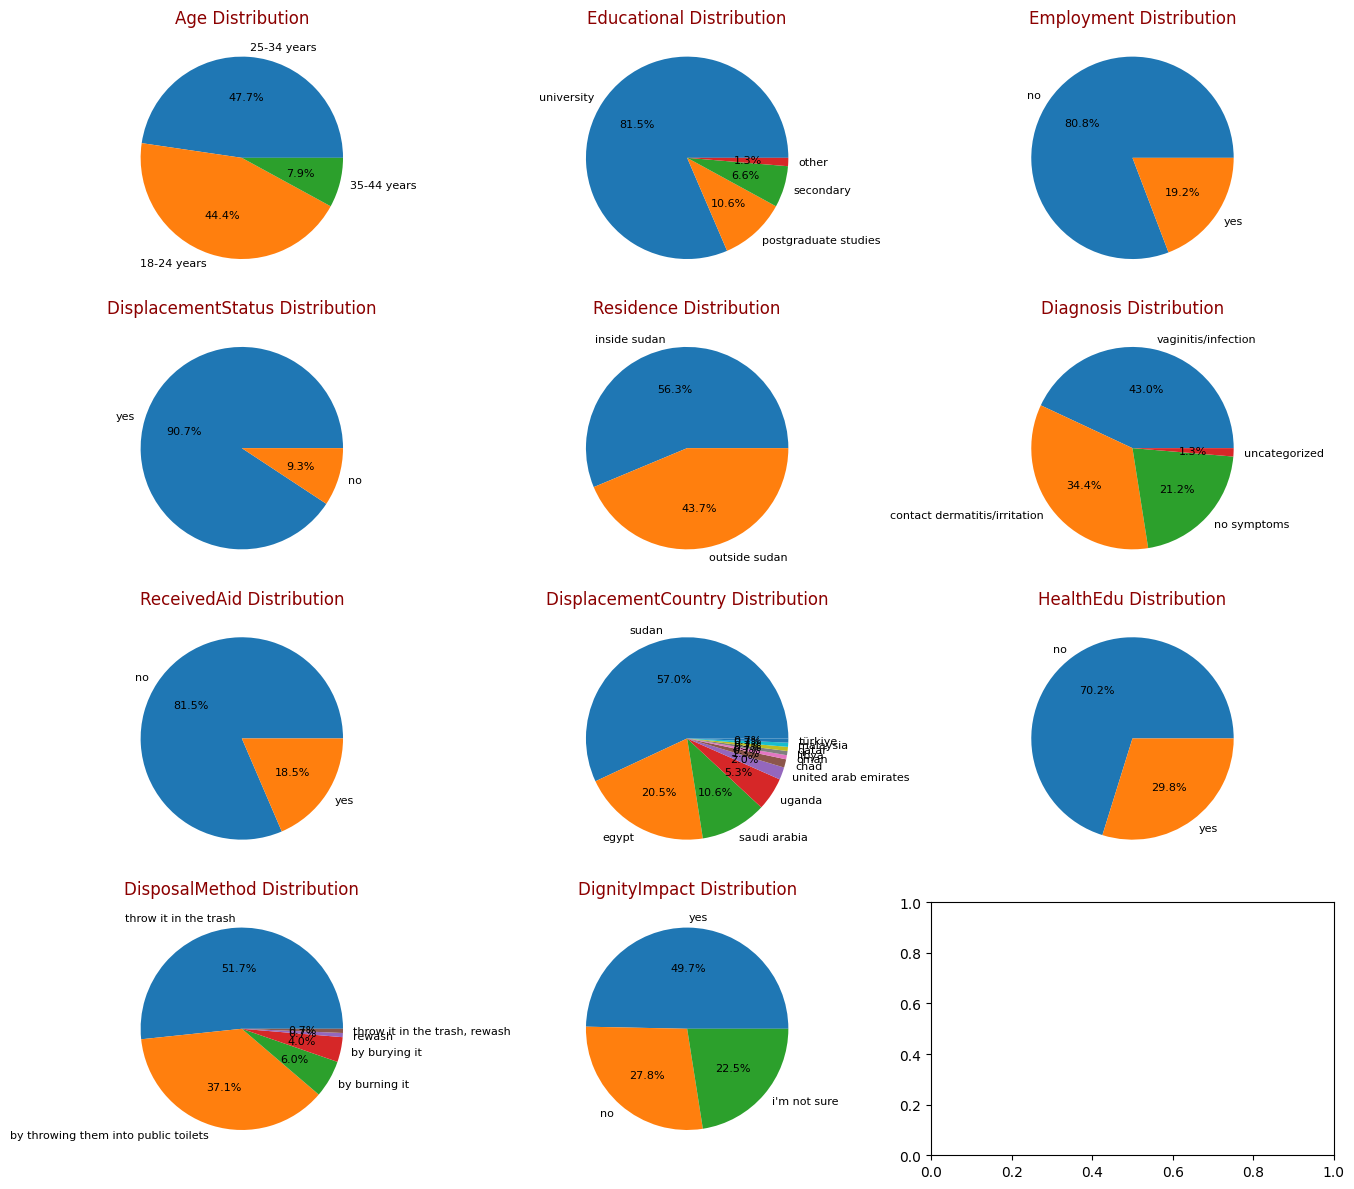

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

column_names = ['Age', 'Educational', 'Employment', 'DisplacementStatus',
                'Residence', 'Diagnosis','ReceivedAid', 'DisplacementCountry', 'HealthEdu',
                'DisposalMethod','DignityImpact']

num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 12))

for i, col in enumerate(column_names):
    row = i // num_cols
    col_idx = i % num_cols
    ax = axes[row, col_idx]

    values = sud[col].astype(str).value_counts()

    ax.pie(values.values,
           labels=values.index,
           autopct='%1.1f%%',
           textprops={'fontsize': 8})

    ax.set_title(col + " Distribution", color='DarkRed')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Example: load your data (replace with your own file)
# df = pd.read_csv('your_file.csv')

# Assuming your DataFrame is named df and has columns:
# "displaced_status" and "health_status"

# Filter rows where displaced_status == "Yes"
displaced = sud[sud["DisplacementStatus"] == "yes"]

# Calculate percentage of health_status == 1 within the displaced group
percentage = (displaced["HealthStatus"].eq(1).mean()) * 100

print(f"Percentage of displaced respondents with infection signs or symptoms = 1: {percentage:.2f}%")


Percentage of displaced respondents with infection signs or symptoms = 1: 78.10%


# Long format Products Before

In [ ]:
# Split the products into lists
sud['ProductsBeforeWar'] = sud['ProductsBefore'].str.split(',')

# Explode (flatten) into long format
df_products = sud.explode('ProductsBeforeWar')

# Clean whitespace
df_products['ProductsBeforeWar'] = df_products['ProductsBeforeWar'].str.strip()

productsbeforewar_freq = df_products['ProductsBeforeWar'].value_counts()
print("=== Access Barriers Frequency ===")
print(productsbeforewar_freq)

=== Access Barriers Frequency ===
ProductsBeforeWar
disposable sanitary pads                          144
old pieces of clothing that you wash and reuse      5
cloth pads                                          3
toilet paper tissues or cotton                      2
Name: count, dtype: int64


### Long format ProductsWar

In [ ]:
# Split the products into lists
sud['ProductsList'] = sud['ProductsWar'].str.split(',')

# Explode (flatten) into long format
df_products = sud.explode('ProductsList')

# Clean whitespace
df_products['ProductsList'] = df_products['ProductsList'].str.strip()

df_products.head()


,Age,Educational,MaritalStatus,Employment,DisplacementStatus,Residence,Locality,State,Amenities,Residence Type (inside Sudan),...,ManagementChallenges,ReceivedAid,AidType,AidSource,HealthEdu,EduFeedback,DignityImpact,Experience,ProductsBeforeWar,ProductsList
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,"difficult access to private bathrooms, a safe ...",no,disposable pads,feminist organization,no,NaN,yes,there's nothing specific,[disposable sanitary pads],disposable sanitary pads
1,25-34 years,university,married,yes,yes,inside sudan,atbara,river nile,city,we rented a house/apartment,...,"privacy, a safe disposal site for used cycle p...",no,NaN,NaN,no,NaN,yes,lack of privacy was the biggest obstacle i fac...,[disposable sanitary pads],disposable sanitary pads
2,18-24 years,university,married,no,yes,inside sudan,al qadarif,al qadarif,city,we rented a house/apartment,...,a safe disposal site for used cycle products,no,NaN,NaN,yes,useful,yes,problems with the high cost and scarcity of di...,[disposable sanitary pads],disposable sanitary pads
3,25-34 years,other,married,no,yes,inside sudan,omdurman,khartoum,city,with one of our relatives,...,difficult access to private bathrooms,yes,"dignity bag (pads, soap, underwear)",refugee camp,yes,benefit from the advice provided.,yes,"i didn't feel safe. i was far from home, there...",[disposable sanitary pads],disposable sanitary pads
4,18-24 years,university,single,no,no,inside sudan,rabak,white nile,city,our owned house,...,privacy,no,NaN,NaN,yes,there was very clear education about the dange...,i'm not sure,the only difficulty i faced during my period w...,[disposable sanitary pads],disposable sanitary pads


### Frequency table for Products Used During War

In [ ]:
products_freq = df_products['ProductsList'].value_counts()
print("=== Access Barriers Frequency ===")
print(products_freq)

=== Access Barriers Frequency ===
ProductsList
disposable sanitary pads                          117
old pieces of clothing that you wash and reuse     29
cloth pads                                         27
toilet paper tissues or cotton                     18
free bleeding                                       2
cotton                                              2
baby's diapers                                      1
Name: count, dtype: int64


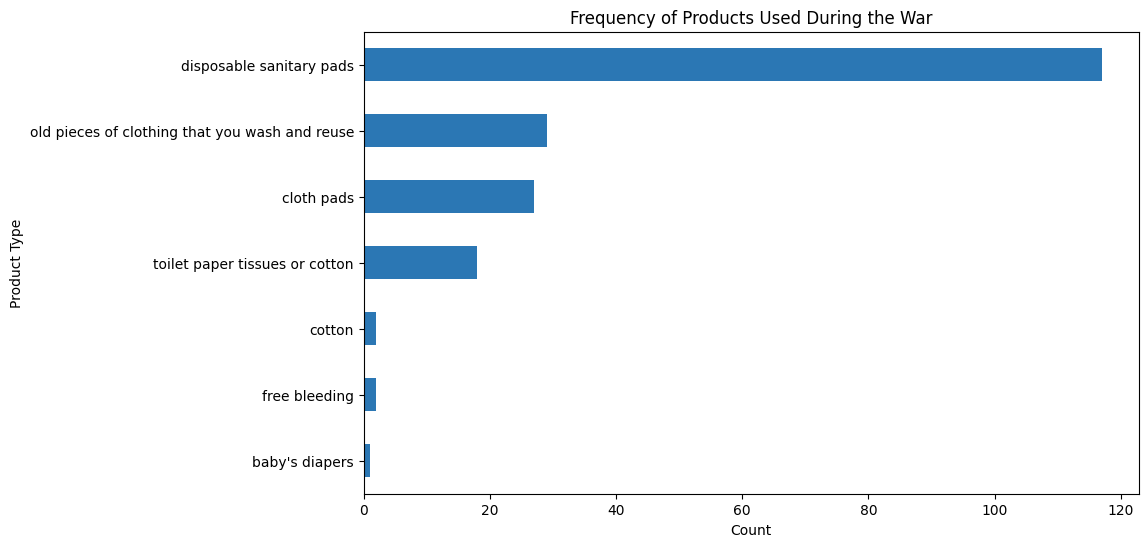

In [ ]:
products_freq.sort_values().plot(kind='barh', color='#2b77b4', figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Frequency of Products Used During the War')
plt.show()

### CrossTab Products List

In [ ]:
pd.crosstab(df_long['ProductsList'], df_long['Diagnosis'], normalize='index') * 100

NameError: name 'df_long' is not defined

In [ ]:
pd.crosstab(df_long['ProductsList'], df_long['HealthStatus'], normalize='index') * 100


# Long format AccessBarriers

In [ ]:
# Split the products into lists
sud['BarriersList'] = sud['AccessBarriers'].str.split(',')

# Explode (flatten) into long format
df_barriers = sud.explode('BarriersList')

# Clean whitespace
df_barriers['BarriersList'] = df_barriers['BarriersList'].str.strip()
df_barriers.head()

,Age,Educational,MaritalStatus,Employment,DisplacementStatus,Residence,Locality,State,Amenities,Residence Type (inside Sudan),...,ReceivedAid,AidType,AidSource,HealthEdu,EduFeedback,DignityImpact,Experience,ProductsBeforeWar,ProductsList,BarriersList
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,no,disposable pads,feminist organization,no,NaN,yes,there's nothing specific,[disposable sanitary pads],[disposable sanitary pads],expensive
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,no,disposable pads,feminist organization,no,NaN,yes,there's nothing specific,[disposable sanitary pads],[disposable sanitary pads],unavailable in my area
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,no,disposable pads,feminist organization,no,NaN,yes,there's nothing specific,[disposable sanitary pads],[disposable sanitary pads],poor quality of available products
1,25-34 years,university,married,yes,yes,inside sudan,atbara,river nile,city,we rented a house/apartment,...,no,NaN,NaN,no,NaN,yes,lack of privacy was the biggest obstacle i fac...,[disposable sanitary pads],[disposable sanitary pads],poor quality of available products
2,18-24 years,university,married,no,yes,inside sudan,al qadarif,al qadarif,city,we rented a house/apartment,...,no,NaN,NaN,yes,useful,yes,problems with the high cost and scarcity of di...,[disposable sanitary pads],[disposable sanitary pads],expensive


# Frequency table for AccessBarriers

In [ ]:
access_freq = df_barriers['BarriersList'].value_counts()
print("=== Access Barriers Frequency ===")
print(access_freq)

=== Access Barriers Frequency ===
BarriersList
expensive                             117
poor quality of available products     72
unavailable in my area                 34
nothing                                 3
i don't know how to use them.           2
Name: count, dtype: int64


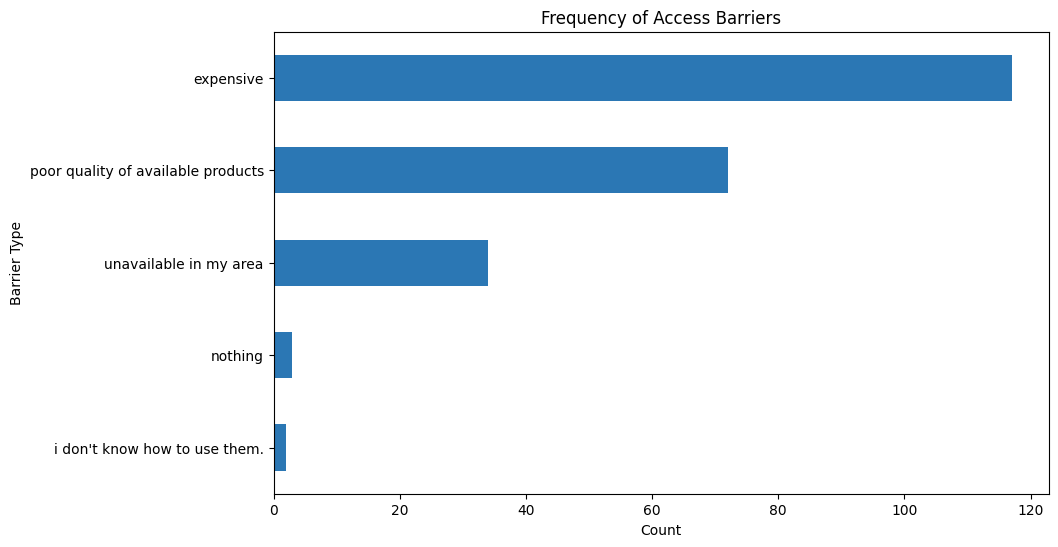

In [ ]:
access_freq.sort_values().plot(kind='barh', color='#2b77b4', figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('Barrier Type')
plt.title('Frequency of Access Barriers')
plt.show()

## Long Format ManagementChallenges

In [ ]:
# Split the products into lists
sud['ManagementChallengesList'] = sud['ManagementChallenges'].str.split(',')

# Explode (flatten) into long format
df_challenges = sud.explode('ManagementChallengesList')

# Clean whitespace
df_challenges['ManagementChallengesList'] = df_challenges['ManagementChallengesList'].str.strip()

df_challenges.head()

,Age,Educational,MaritalStatus,Employment,DisplacementStatus,Residence,Locality,State,Amenities,Residence Type (inside Sudan),...,AidType,AidSource,HealthEdu,EduFeedback,DignityImpact,Experience,ProductsBeforeWar,ProductsList,BarriersList,ManagementChallengesList
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,disposable pads,feminist organization,no,NaN,yes,there's nothing specific,[disposable sanitary pads],[disposable sanitary pads],"[expensive, unavailable in my area, poor qua...",difficult access to private bathrooms
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,disposable pads,feminist organization,no,NaN,yes,there's nothing specific,[disposable sanitary pads],[disposable sanitary pads],"[expensive, unavailable in my area, poor qua...",a safe disposal site for used cycle products
1,25-34 years,university,married,yes,yes,inside sudan,atbara,river nile,city,we rented a house/apartment,...,NaN,NaN,no,NaN,yes,lack of privacy was the biggest obstacle i fac...,[disposable sanitary pads],[disposable sanitary pads],[poor quality of available products],privacy
1,25-34 years,university,married,yes,yes,inside sudan,atbara,river nile,city,we rented a house/apartment,...,NaN,NaN,no,NaN,yes,lack of privacy was the biggest obstacle i fac...,[disposable sanitary pads],[disposable sanitary pads],[poor quality of available products],a safe disposal site for used cycle products
2,18-24 years,university,married,no,yes,inside sudan,al qadarif,al qadarif,city,we rented a house/apartment,...,NaN,NaN,yes,useful,yes,problems with the high cost and scarcity of di...,[disposable sanitary pads],[disposable sanitary pads],[expensive],a safe disposal site for used cycle products


## Frequency Table of ManagementChallenges

In [ ]:
challenges_freq = df_challenges['ManagementChallengesList'].value_counts()
print("=== Management Challenges Frequency ===")
print(challenges_freq)

=== Management Challenges Frequency ===
ManagementChallengesList
a safe disposal site for used cycle products    65
privacy                                         65
difficult access to private bathrooms           42
clean water                                     38
soap                                            15
nothing                                         13
suitable products                                2
lack of painkillers                              2
bathrooms with bidets or water hoses             1
Name: count, dtype: int64


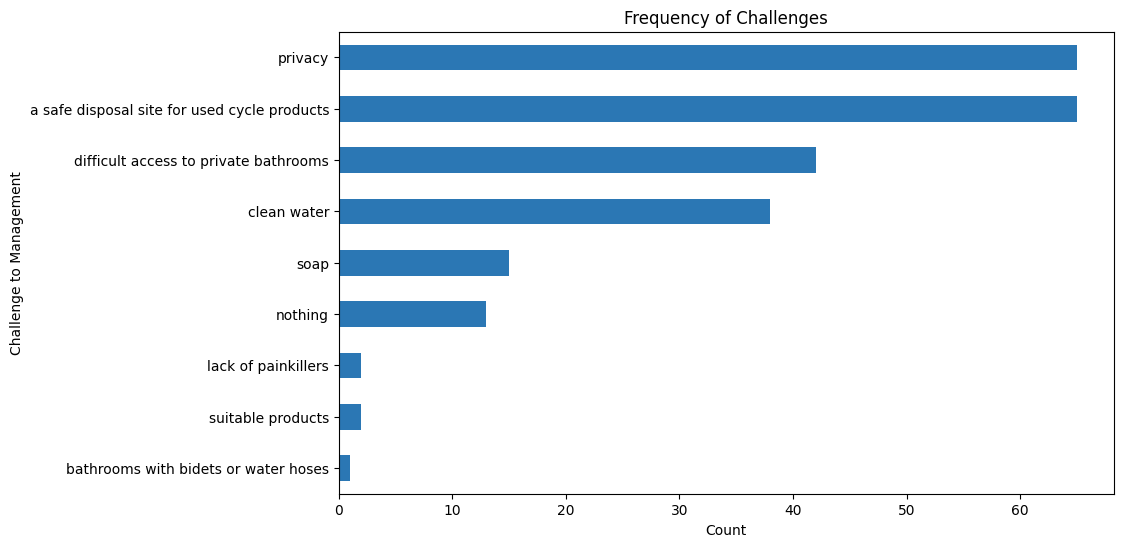

In [ ]:
challenges_freq.sort_values().plot(kind='barh', color='#2b77b4', figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('Challenge to Management')
plt.title('Frequency of Challenges')
plt.show()
